# Looking at a specific run with no source masking on incoming nemo fields

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.geoaxes import GeoAxes
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import fstd2nc
import cftime

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.geoaxes import GeoAxes
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import fstd2nc
import cftime

/home/ncs001/.conda/envs/gem-vis/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
def plot_yg_fields(yin_rlon, yin_rlat, yin_field, yan_rlon, yan_rlat, yan_field, **kwargs):
    '''Create a compound figure of Yin/Yang panels, plotted in rotated coordinates.
    '''
    fig = plt.figure(figsize=(8,14))

    rotated_yan = ccrs.RotatedPole(pole_latitude=8.050,pole_longitude=352.579, central_rotated_longitude=180)
    rotated_yin = ccrs.RotatedPole(pole_latitude=31.758,pole_longitude=87.597)
    data_crs = ccrs.PlateCarree()

    axes_class = (GeoAxes,
                      dict(projection=data_crs))


    grid = AxesGrid(fig, 111, axes_class=axes_class,
                        nrows_ncols=(2, 1),
                        axes_pad=0.25,
                        cbar_location='right',
                        cbar_mode='single',
                        cbar_pad=0.1,
                        cbar_size='3%',
                        label_mode='')  # note the empty label_modead=0.05

    axl = grid[0]
    axl.contourf(yin_rlon, yin_rlat, yin_field,transform=rotated_yin, **kwargs)
    axl.coastlines(linewidth=0.1)  

    axr = grid[1]
    cm = axr.contourf(yan_rlon+180, yan_rlat, yan_field, transform=rotated_yan, **kwargs)
    axr.coastlines(linewidth=0.1)
    grid.cbar_axes[0].colorbar(cm,extend='both')

In [3]:
def mesh_yg_fields(yin_rlon, yin_rlat, yin_field, yan_rlon, yan_rlat, yan_field, **kwargs):
    '''Create a compound figure of Yin/Yang panels, plotted in rotated coordinates.
    '''
    fig = plt.figure(figsize=(8,14))

    rotated_yan = ccrs.RotatedPole(pole_latitude=8.050,pole_longitude=352.579, central_rotated_longitude=180)
    rotated_yin = ccrs.RotatedPole(pole_latitude=31.758,pole_longitude=87.597)
    data_crs = ccrs.PlateCarree()

    axes_class = (GeoAxes,
                      dict(projection=data_crs))


    grid = AxesGrid(fig, 111, axes_class=axes_class,
                        nrows_ncols=(2, 1),
                        axes_pad=0.25,
                        cbar_location='right',
                        cbar_mode='single',
                        cbar_pad=0.1,
                        cbar_size='3%',
                        label_mode='')  # note the empty label_modead=0.05

    axl = grid[0]
    axl.pcolormesh(yin_rlon, yin_rlat, yin_field,transform=rotated_yin, **kwargs)
    axl.coastlines(linewidth=0.1)  

    axr = grid[1]
    cm = axr.pcolormesh(yan_rlon+180, yan_rlat, yan_field, transform=rotated_yan, **kwargs)
    axr.coastlines(linewidth=0.1)
    grid.cbar_axes[0].colorbar(cm,extend='both')

In [4]:
# These are outputs from a CanAM-GEM AMIP run on the 303x115 grid
ds_amip_yin = xr.open_dataset('/home/ncs001/site5/gemdc-tests/yy_out/yy_out_ng/BEGO_2003010100_00000006_yin.nc')
ds_amip_yan = xr.open_dataset('/home/ncs001/site5/gemdc-tests/yy_out/yy_out_ng/BEGO_2003010100_00000006_yan.nc')

In [7]:

ds_cpl_his4 = xr.open_dataset('/space/hall6/sitestore/eccc/crd/ccrn/ccrn_tmp/rcs001/tmp_turnoffsrcmask_cancpl_gem_test_96928/work/cpl_history.nc',
                              )        # run without source masking on nemo remap    
ds_cpl_his4                 

<xarray.Dataset>
Dimensions:               (time: 1254, nlat_atm_yin: 115, nlon_atm_yin: 303,
                           nlat_atm_yang: 115, nlon_atm_yang: 303,
                           nlat_ocn: 292, nlon_ocn: 362)
Coordinates:
  * time                  (time) datetime64[ns] 2003-01-01 ... 2003-06-06T15:...
Dimensions without coordinates: nlat_atm_yin, nlon_atm_yin, nlat_atm_yang,
                                nlon_atm_yang, nlat_ocn, nlon_ocn
Data variables: (12/79)
    lon_atm_yin           (nlat_atm_yin, nlon_atm_yin) float64 ...
    lat_atm_yin           (nlat_atm_yin, nlon_atm_yin) float64 ...
    lon_atm_yang          (nlat_atm_yang, nlon_atm_yang) float64 ...
    lat_atm_yang          (nlat_atm_yang, nlon_atm_yang) float64 ...
    lon_ocn               (nlat_ocn, nlon_ocn) float64 ...
    lat_ocn               (nlat_ocn, nlon_ocn) float64 ...
    ...                    ...
    god_weights_atm_yin   (nlat_atm_yin, nlon_atm_yin) float64 ...
    flno_atm_yin          (nlat_atm_yin, nlon_atm_yin) float64 ...
    cell_area_atm_yang    (nlat_atm_yang, nlon_atm_yang) float64 ...
    god_weights_atm_yang  (nlat_atm_yang, nlon_atm_yang) float64 ...
    flno_atm_yang         (nlat_atm_yang, nlon_atm_yang) float64 ...
    nemo_tmask            (nlat_ocn, nlon_ocn) float64 ...
Attributes:
    CCCma_runid:  default

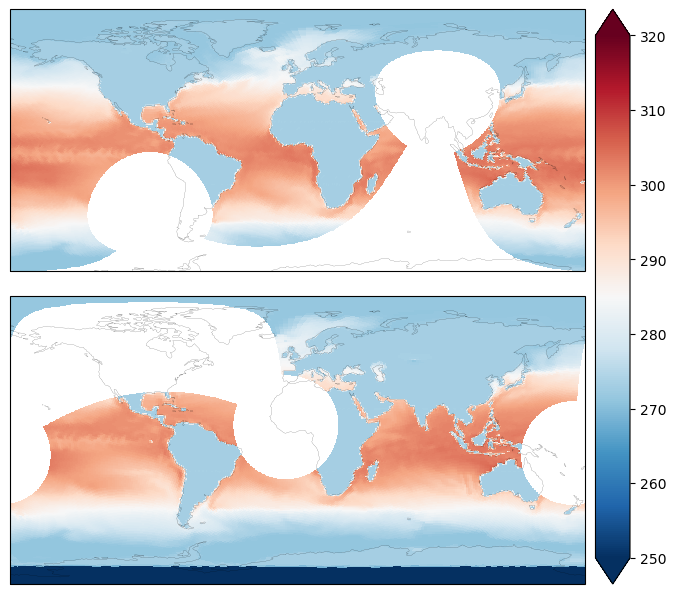

In [11]:
mesh_yg_fields(ds_amip_yin.rlon, ds_amip_yin.rlat, ds_cpl_his4.GT_atm_yin.isel(time=3),#.compute(scheduler=client), 
               ds_amip_yan.rlon, ds_amip_yan.rlat, ds_cpl_his4.GT_atm_yang.isel(time=3),#.compute(scheduler=client), 
               cmap='RdBu_r',vmin=250, vmax=320,)